In [15]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

In [16]:
events_in_this_sim = 50000

In [120]:
dir_ = '.'
inFile_k100 = '%s/mySim_50k_1mm_placedFarSide_HP_G4Flags.root'%(dir_)

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree = file_k100["Hits"]

if(not tree):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

tree.show()
EV = tree['fEvent'].array(library='np')
neutronE = tree['fNeutron_energy'].array(library='np')
x = tree['fNeutronX'].array(library='np')
y = tree['fNeutronY'].array(library='np')
z = tree['fNeutronZ'].array(library='np')
pid = tree['fPDGID'].array(library='np')
KE = tree['fsec_KE'].array(library='np')


df = pd.DataFrame( {'EV' : EV,
                    'neutronE' : neutronE,
                    'x' : x,
                    'y' : y,
                    'z' : z,
                    'pid' : pid,
                    'KE' : KE}
                 )
df.head(5)

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fEvent               | int32_t                  | AsDtype('>i4')
fNeutron_energy      | double                   | AsDtype('>f8')
fNeutronX            | double                   | AsDtype('>f8')
fNeutronY            | double                   | AsDtype('>f8')
fNeutronZ            | double                   | AsDtype('>f8')
fPDGID               | int32_t                  | AsDtype('>i4')
fsec_KE              | double                   | AsDtype('>f8')


,EV,neutronE,x,y,z,pid,KE
0,217,2.500000e-08,0.0,0.0,900.156207,22,7.196675
1,217,2.500000e-08,0.0,0.0,900.156207,22,2.999199
2,217,2.500000e-08,0.0,0.0,900.156207,320740,0.000374
3,258,2.500000e-08,0.0,0.0,899.922450,22,5.429043
4,258,2.500000e-08,0.0,0.0,899.922450,22,0.068708


In [121]:
len(np.unique(df.EV))

514

In [122]:
#df[int(df.pid/1e4) == 320710]
df[(df.pid/1e4).astype(int) == 32]

,EV,neutronE,x,y,z,pid,KE
2,217,2.500000e-08,0.00000,0.000000,900.156207,320740,0.000374
8,258,2.500000e-08,0.00000,0.000000,899.922450,320740,0.000284
15,319,2.500000e-08,0.00000,0.000000,900.272464,320740,0.000401
20,463,2.500000e-08,0.00000,0.000000,900.322476,320740,0.000356
26,530,2.500000e-08,0.00000,0.000000,900.080129,320740,0.000055
...,...,...,...,...,...,...,...
2261,49442,2.500000e-08,0.00000,0.000000,900.364377,320730,0.000193
2267,49562,2.500000e-08,0.00000,0.000000,900.366102,320740,0.000446
2271,49598,2.344541e-08,3.54382,67.308941,900.110166,320740,0.000293
2274,49620,2.500000e-08,0.00000,0.000000,900.093243,320710,0.000358


In [123]:
Ge70 = df[df.pid == 320710]
Ge71 = df[df.pid == 320720]
Ge72 = df[df.pid == 320730]
Ge73 = df[df.pid == 320740]
Ge74 = df[df.pid == 320750]
Ge75 = df[df.pid == 320760]
Ge76 = df[df.pid == 320770]

In [124]:
total = len(Ge70) + len(Ge71) + len(Ge72) + len(Ge73) + len(Ge74) + len(Ge75) + len(Ge76)
print('Ge 70 = %0.3f'%(len(Ge70)/total))
print('Ge 71 = %0.3f'%(len(Ge71)/total))
print('Ge 72 = %0.3f'%(len(Ge72)/total))
print('Ge 73 = %0.3f'%(len(Ge73)/total))
print('Ge 74 = %0.3f'%(len(Ge74)/total))
print('Ge 75 = %0.3f'%(len(Ge75)/total))
print('Ge 76 = %0.3f'%(len(Ge76)/total))


Ge 70 = 0.278
Ge 71 = 0.000
Ge 72 = 0.115
Ge 73 = 0.512
Ge 74 = 0.091
Ge 75 = 0.000
Ge 76 = 0.004


Warning in <TROOT::Append>: Replacing existing TH1: h_evt (Potential memory leak).


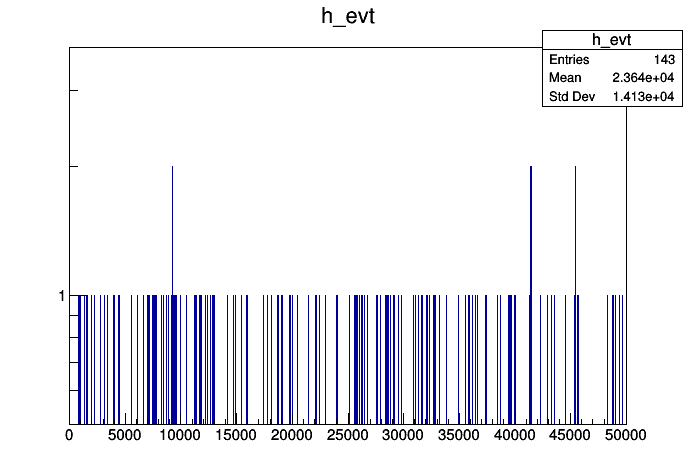

In [125]:
isotope = df[df.pid == 320710]
h_evt = rt.TH1F('h_evt','h_evt',5000,0,50000)
for i in range(len(isotope)):
    h_evt.Fill(isotope.iloc[i].EV)

c = rt.TCanvas()
h_evt.Draw()
rt.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_x_y_Ge70Cap (Potential memory leak).


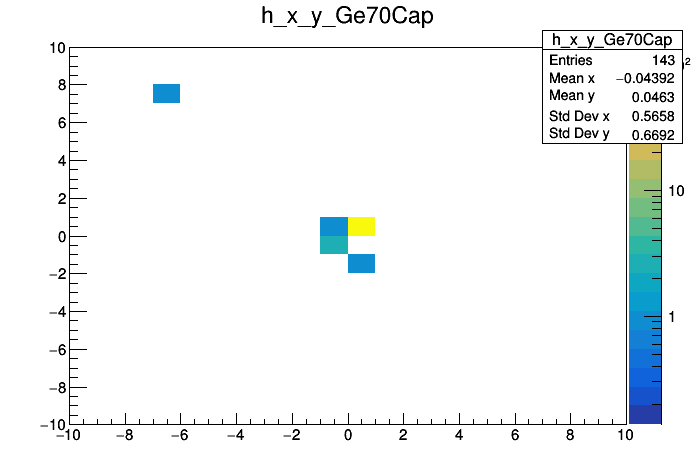

In [126]:
h_x_y_Ge70Cap = rt.TH2F('h_x_y_Ge70Cap','h_x_y_Ge70Cap',20,-10,10,20,-10,10)

for i in range(len(Ge70)):
    h_x_y_Ge70Cap.Fill(Ge70.iloc[i].x/10,Ge70.iloc[i].y/10)
    
c = rt.TCanvas()
h_x_y_Ge70Cap.Draw('colz')
rt.gPad.SetLogz()
c.Draw()

In [66]:
((318)/50000)*1105

7.0278

In [127]:
Nncap = 143
Nneutron = 50000
dt = 0.1 #in cm
N_A = 6.022e23 # avogadro's number
# Al
# density = 2.7 #g/cm3
# molar_mass = 26.98 # g/mol
#Ge
density = 5.323 #g/cm3
molar_mass = 72.61 # g/mol
abundance = 0.205

n = abundance* (density/molar_mass) * N_A #atoms per unit volume


In [128]:
cross_section = (Nncap/Nneutron)*(1.0/(n*dt))*1e24

In [129]:
cross_section

3.160176880340024

In [24]:
144/218

0.6605504587155964